# Singular Value Decomposition.

Editing jupyter notebook. Centering all the figures.

In [1]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

### Example: Image Compression

The idea of this exercise is to explore how differente ranks of the truncated SVD approximate an image. As a consecuence, the truncated image should have less resolution but it should be compressed.

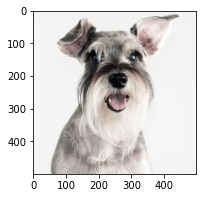

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
plt.rcParams['figure.figsize'] = [3, 3]
plt.rcParams.update({'font.size': 10})

url = 'https://http2.mlstatic.com/D_NQ_NP_684908-MLA32378954586_092019-O.jpg'
image = io.imread(url)
plt.imshow(image)
plt.show()


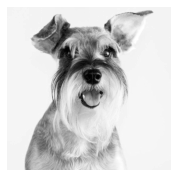

In [5]:
X = np.mean(image,-1) #Convert RGB to grayscale
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()


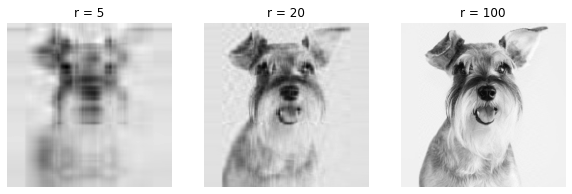

In [6]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)


fig=plt.figure(figsize=(10, 10))
for i in range(1,4):
    l = (5, 20, 100)
    r = l[i-1]
    img = U[:,:r] @ S[:r,:r] @ VT[:r,:]
    fig.add_subplot(1, 3, i)
    img = plt.imshow(img)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
plt.show()

Below we observe that the truncated SVD is a good approximation because the first modes of the eigenvalues compress a huge part of the information of the whole image.

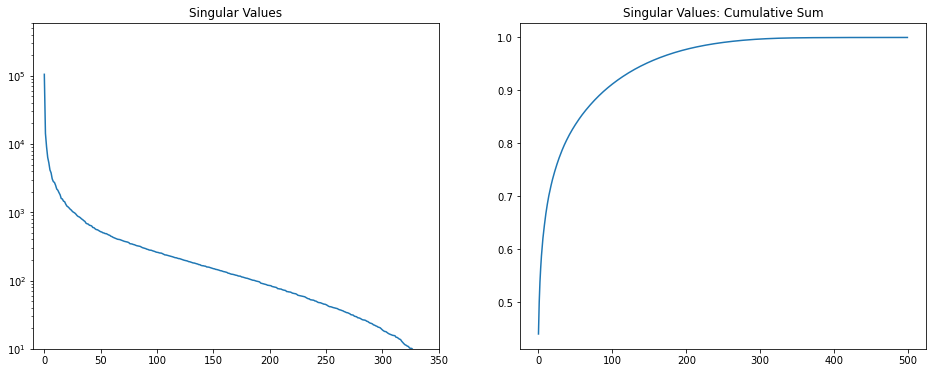

In [7]:
fig=plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.semilogy(np.diag(S))
plt.ylim([10,600000])
plt.xlim([-10, 350])
plt.title('Singular Values')

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

### Example II: Linear regression

In this example we computed the least square method for an experimental sample using SVD and we observed how the approximated solution extracted from the experimetal data matchs to the real solution according to the number of experimental points sampled.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams.update({'font.size': 10})

def f(r):
    x = 3 # True slope
    a = np.arange(-2,2,r) # r:  amount of point generated
    a = a.reshape(-1, 1) #from row to col vector
    b = x*a + np.random.randn(*a.shape) # Add white noise

    plt.plot(a, x*a, Color='k', LineWidth=2, label='True line') # True relationship
    plt.plot(a, b, 'x', Color='r', MarkerSize = 10, label='Noisy data') # Noisy measurements

    U, S, VT = np.linalg.svd(a,full_matrices=False)
    xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # Least-square fit

    plt.plot(a,xtilde * a,'--',Color='b',LineWidth=4, label='Regression line')

    plt.xlabel('a')
    plt.ylabel('b')

    plt.grid(linestyle='--')
    plt.legend()
    plt.show()

interact(f,r=(0.1,1,0.1))

interactive(children=(FloatSlider(value=0.5, description='r', max=1.0, min=0.1), Output()), _dom_classes=('wid…

<function __main__.f(r)>

### Example III: Prediction

There is a Table hald_ingredients.csv which represents differents amounts  of 4 components used to prepare a cement mixture. As a consequence of the reaction between the components, heat is generated. The amount of heat generated by a each of the 13 experiments performed (where a particular combination of components was tested) is recorded in hald_heat.csv. The idea of this example is to build a model that can predict the amount of heat generated by a new comnbination of components.

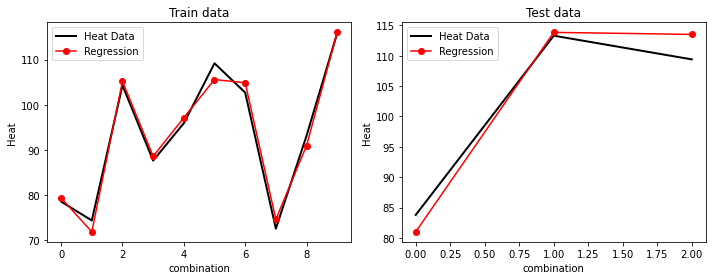

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams.update({'font.size': 10})

# Load dataset
A = np.loadtxt(os.path.join('DATA','hald_ingredients.csv'),delimiter=',')
b = np.loadtxt(os.path.join('DATA','hald_heat.csv'),delimiter=',')

# Split the sample
train_matrix, train_vec = A[:-3], b[:-3] 
test_matrix, test_vec = A[-3:], b[-3:]

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(train_matrix,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ train_vec

fig=plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_vec, Color='k', LineWidth=2, label='Heat Data') # True relationship
plt.plot(train_matrix@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('combination')
plt.ylabel('Heat')
plt.title('Train data')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_vec, Color='k', LineWidth=2, label='Heat Data') # True relationship
plt.plot(test_matrix@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('combination')
plt.ylabel('Heat')
plt.title('Test data')
plt.legend()
plt.tight_layout()
plt.show()

### Example IV: Housing 

In this example, we explore a data set to determine which factors best predict prices in the Boston housing market. There are 13 attributes that are correlated with house price, such as per capita crime rate and property-tax rate. These features are regressed onto the price data. The goal of this exercise is to obtain the best fit price prediction. 

##### Remark I: 
This data contains prices and attributes for 506 homes, so the attribute matrix is of size 506 × 13. The last column is the house price according to that features.

#####  Remark II: 
In this case we need to capture the posible general trend (or mean) of housing. Even when every feature is zero, this trend might not be zero. So we are going to use a linear model like: $\mathbf{Y = A X + \mu}$, and the matrix representation is as follows,
\begin{equation}
\begin{bmatrix}
1 & A_{11} & \dots & A_{1m}\\
\vdots & \vdots & &\\
1 & A_{n1} & & A_{nm}
\end{bmatrix}
\begin{bmatrix}
\mu \\ X_1 \\ \vdots \\ X_m  
\end{bmatrix} = 
\begin{bmatrix}Y_1 \\ \vdots \\ Y_n  
\end{bmatrix}
\end{equation}

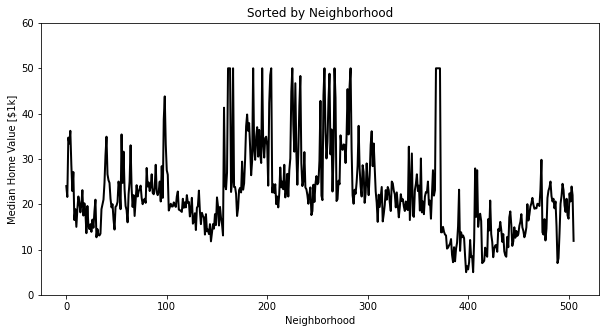

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 10})

# Load dataset
H = np.loadtxt(os.path.join('DATA','housing.data'))
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # other factors

plt.plot(b, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.ylim([0,60])
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.title('Sorted by Neighborhood')
plt.show()

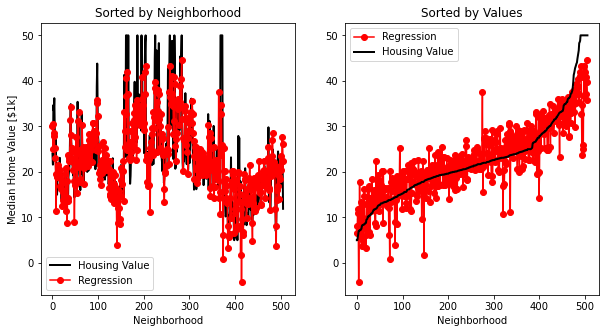

In [8]:
# Pad with ones for nonzero offset in the last col of the matrix
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.plot(b, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(A@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.title('Sorted by Neighborhood')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
b = b[sort_ind] # sorted values
plt.plot(A[sort_ind,:]@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.plot(b, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.xlabel('Neighborhood')
plt.title('Sorted by Values')
plt.legend()

plt.show()

#### Singular Value exploration before normalization. 
The behaviour is as expected.

Text(0.5, 1.0, 'Singular Values: Cumulative Sum')

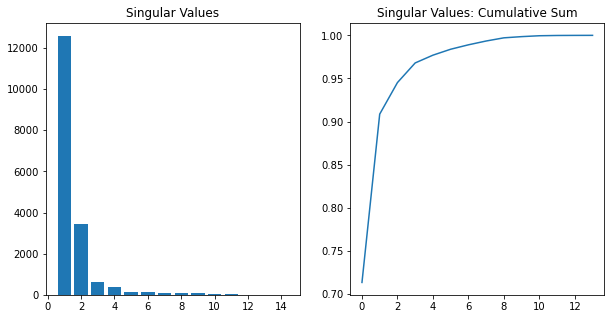

In [9]:
fig=plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1,len(S)+1),S)
plt.title('Singular Values')

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(S)/np.sum(S))
plt.title('Singular Values: Cumulative Sum')

#### Exploring features

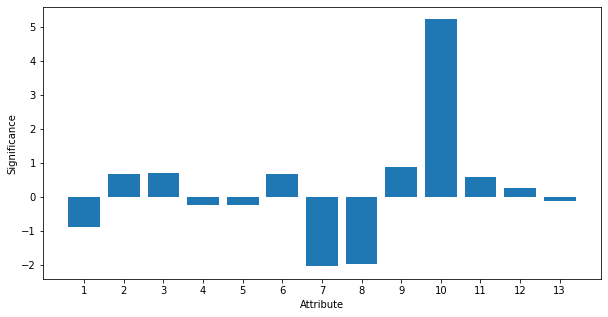

In [10]:
# Copy all the matrix except the last col.
B = A[:,:-1]
# Computing the column mean and the subtracting it for every column. The result is divided for the col. std.
A2 = (B-np.mean(B, axis=0))/np.std(B,axis=0)

U, S, VT = np.linalg.svd(A2,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(1,len(x)+1)
plt.bar(x_tick,x)
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()



#### SVD after the normalization

Text(0.5, 1.0, 'Singular Values: Cumulative Sum')

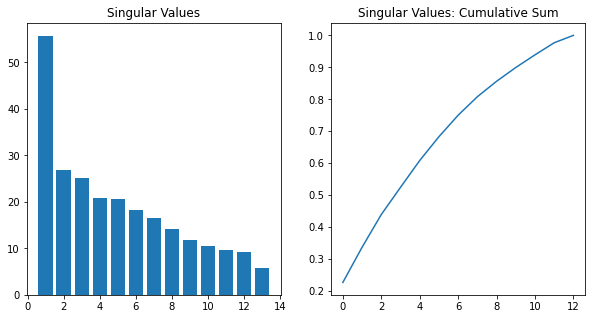

In [11]:
fig=plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1,len(S)+1),S)
plt.title('Singular Values')

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(S)/np.sum(S))
plt.title('Singular Values: Cumulative Sum')

#### Train and Test the Linar model.

Split the data set in half to train and test the model.

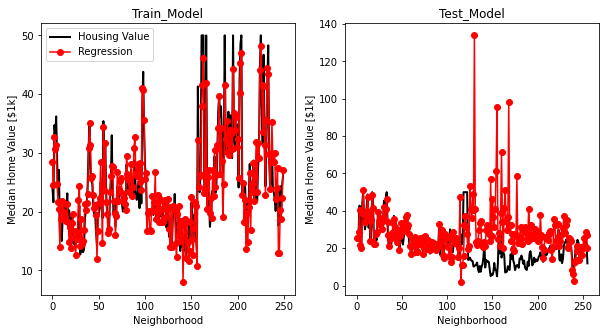

In [12]:
# reLoad dataset
H = np.loadtxt(os.path.join('DATA','housing.data'))
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # other factors

# Pad with ones for nonzero offset in the last col of the matrix
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)
train_matrix, train_vec = A[:250,:], b[:250]
test_matrix, test_vec = A[250:,:], b[250:]

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(train_matrix,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ train_vec

fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.plot(train_vec, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(train_matrix@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.title('Train_Model')
plt.legend()

ax2 = fig.add_subplot(122)
plt.plot(test_vec, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(test_matrix@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.title('Test_Model')
plt.show()


The model captures the trend of half of the data tested, then deviations are observed. This behaviour might be caused because the data was collected neighbour by neighbour. In consequence when we splitted the data in half, there were particular features 
for which the model has not been trained. In order to solve this issue we will mix the rows of the matrix

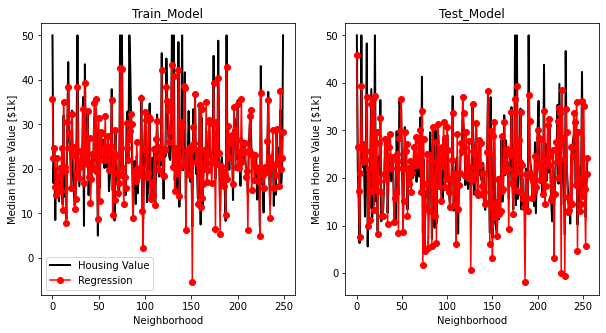

In [13]:
seed = 999999937 
np.random.seed(seed)  

indices = np.arange(A.shape[0])
np.random.shuffle(indices)

A = A[indices]
b = b[indices]

train_matrix, train_vec = A[:250,:], b[:250]
test_matrix, test_vec = A[250:,:], b[250:]

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(train_matrix,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ train_vec

fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.plot(train_vec, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(train_matrix@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.title('Train_Model')
plt.legend()

ax2 = fig.add_subplot(122)
plt.plot(test_vec, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(test_matrix@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.title('Test_Model')
plt.show()

### Principal Component Analysis

#### Example I: Ovarian Cancer

This example consists of gene data for 216 patients, the first 121 of them have ovarian cancer, and the last 95 do not. For each patient, there is a vector of data containing the expression of 4000 genes. The goal of this example is to find out if there is a high correlation between some gene expression and ovarian cancer manifestations.

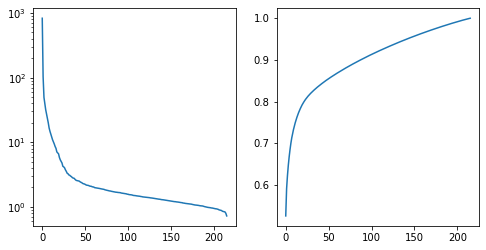

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams.update({'font.size': 10})

obs = np.loadtxt(os.path.join('DATA','ovariancancer_obs.csv'),delimiter=',')
f = open(os.path.join('DATA','ovariancancer_grp.csv'), "r")
grp = f.read().split("\n")[:-1]

U, S, VT = np.linalg.svd(obs,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-')

plt.show()

Lets see if there is any gene that has a high impact in the disease

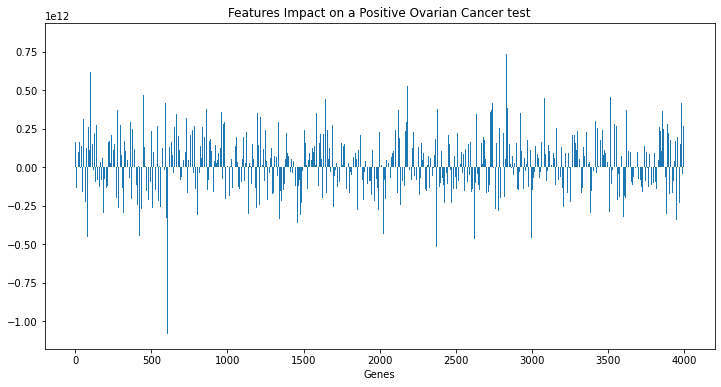

In [15]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 10})

#If I want the impact on a Negative test I should invert this list. 1 for negative, 0 for positive.
bool_grp = [1 if i =='Cancer' else 0 for i in grp]
A2 = (obs-np.mean(obs, axis=0))/np.std(obs,axis=0)

U, S, VT = np.linalg.svd(A2[:,:],full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ bool_grp[:]
x_tick = range(1,len(x)+1)
plt.bar(x_tick,x)
plt.xlabel('Genes')
plt.title('Features Impact on a Positive Ovarian Cancer test')
plt.show()

3D Plot of the first 3 principal components.

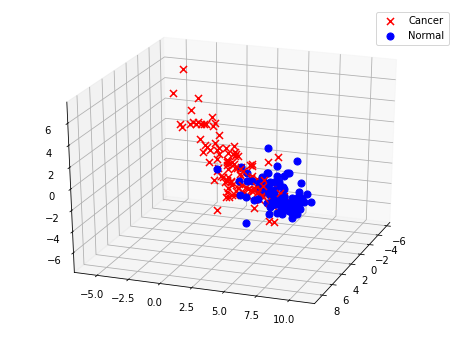

In [16]:
fig2 = plt.figure(figsize = (8,6))
ax = fig2.add_subplot(111, projection='3d')

targets, colors = ['Cancer', 'Normal'], ['r', 'b']
for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T
    z = VT[2,:] @ obs[j,:].T
    
    if grp[j] == 'Cancer':
        p= ax.scatter(x,y,z,marker='x',color='r',s=50)
    elif grp[j] == 'Normal':
        q= ax.scatter(x,y,z,marker='o',color='b',s=50)
plt.legend([p,q], ['Cancer','Normal'])
ax.view_init(25,20)
plt.show()


#### Using Scikit-learn package to compute the PCA

In [70]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Separating out the features
x = obs
# Separating out the target
y = grp
# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
principalDf['grp'] = y

principalDf

principal component 1  principal component 2  principal component 3  \
0                 7.633440             -15.889833              -7.887492   
1                25.957001              -3.564882              -9.606652   
2                29.741879             -18.452139             -30.091997   
3                32.839751              -2.202364              -5.859725   
4                37.350792             -22.920814              -8.897647   
..                     ...                    ...                    ...   
211             -38.444775             -12.191678               2.859787   
212             -18.176010             -10.446570              -4.289940   
213             -25.763753             -18.276975               7.455054   
214             -28.145781             -15.152989               5.194179   
215              -9.818059              -2.706948               6.661480   

        grp  
0    Cancer  
1    Cancer  
2    Cancer  
3    Cancer  
4    Cancer  
..      ...  
211  Normal  
212  Normal  
213  Normal  
214  Normal  
215  Normal  

[216 rows x 4 columns]

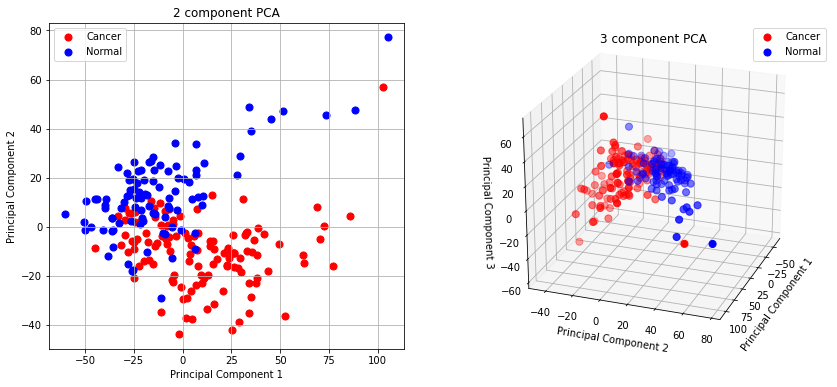

In [19]:
plt.rcParams['figure.figsize'] = [14, 6]
plt.rcParams.update({'font.size': 10})

########1st Plot########

fig = plt.figure()
ax = fig.add_subplot(1,2,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA', fontsize = 12)
targets = ['Cancer', 'Normal']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['grp'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

########2nd Plot########
from mpl_toolkits.mplot3d import Axes3D  

a2x = fig.add_subplot(1,2,2, projection='3d') 
a2x.set_xlabel('Principal Component 1')
a2x.set_ylabel('Principal Component 2')
a2x.set_zlabel('Principal Component 3')
a2x.set_title('3 component PCA', fontsize = 12)
targets, colors = ['Cancer', 'Normal'], ['r', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = principalDf['grp'] == target
    a2x.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , principalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
a2x.legend(targets)
a2x.view_init(25,20)

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 22.18% of the variance and the second principal component contains 8.71% of the variance. 

In [30]:
pca.explained_variance_ratio_

array([0.22187977, 0.08711637, 0.03823538])

#### Training and testing a Linear model based on the data

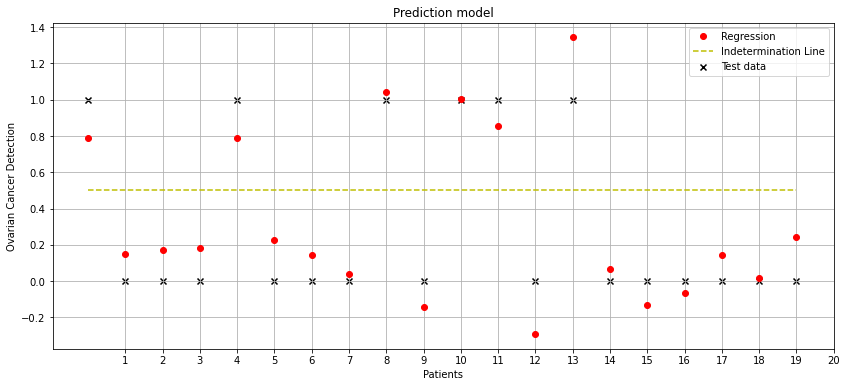

In [133]:
b = np.array([1 if i =='Cancer' else 0 for i in grp])
A = obs
seed = 999999937 
np.random.seed(seed)  

indices = np.arange(A.shape[0])
np.random.shuffle(indices)
# 20 persosns are used as test the rest are train data.
test_index, train_index = indices[-20:], indices[:-20]

# Pad with ones for nonzero offset in the last col of the matrix
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)
train_matrix, train_vec = A[train_index,:], b[train_index]
test_matrix, test_vec = A[test_index,:], b[test_index]

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(train_matrix,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ train_vec

fig = plt.figure()

ax2 = fig.add_subplot(111)
ax2.scatter(range(len(test_vec)),test_vec, marker='x', Color='k', label='Test data') # True relationship
plt.plot(test_matrix@x, 'o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.plot([0.5 for i in range(len(test_vec))], '--', Color='y', LineWidth=1.5, label='Indetermination Line')
plt.grid(linestyle='-'), plt.xticks(range(1,len(test_vec)+1))
plt.xlabel('Patients')
plt.ylabel('Ovarian Cancer Detection')
plt.title('Prediction model')
plt.legend()
plt.show()


#### Example II: Eigenfaces example.

In this problem, PCA is applied to a large library of facial images of 38 individuals, under 9 poses and 64 lighting conditions, to extract the most dominant correlations between them. The result of this decomposition is a set of eigenfaces that define a new coordinate system. Images may be represented in these coordinates by taking the dot product with each of the principal components. Images of the same person tend to cluster in the eigenface space, making this a useful transformation for facial recognition and classification. 

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
# plt.rcParams.update({'font.size': 18})

36/38 individual are reserved for training a model. Lets plot the images of each one of them.

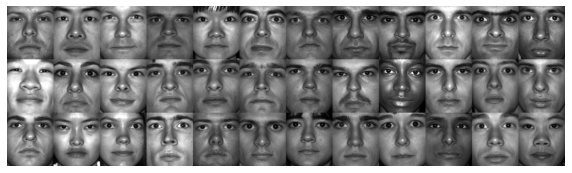

In [6]:
mat_contents = scipy.io.loadmat(os.path.join('DATA','allFaces.mat'))
data = mat_contents['faces']
n_faces = mat_contents['nfaces'][0]
# each photo has nxm pixels.
m = int(mat_contents['m'])
n = int(mat_contents['n'])

def all_faces(matrix=True):
    all_faces = {}
    count = 0
    for i,j in enumerate(n_faces):
        all_faces[i] = {}
        for k in range(j):
            if matrix == True:
                 aux = np.reshape(data[:,count],(m,n)).T
            else:
                aux = data[:,count]
            all_faces[i][k] = aux
            count += 1
    return all_faces

faces = all_faces()
first_photos = np.bmat([[faces[j+12*i][0] for j in range(12)] for i in range(3)])
img = plt.imshow(first_photos)
img.set_cmap('gray')
plt.axis('off')
plt.show()

For each individual we have 64 photos of lighting conditions.

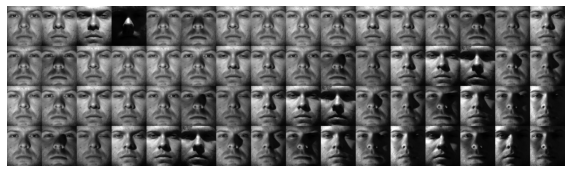

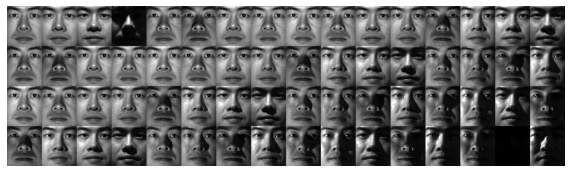

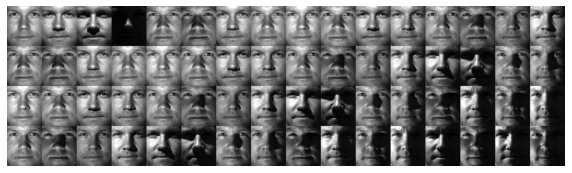

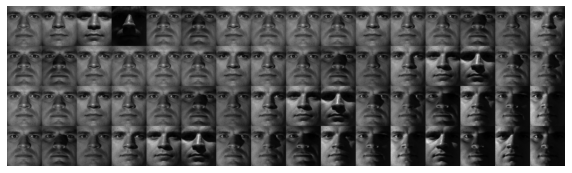

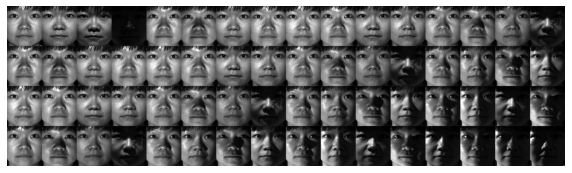

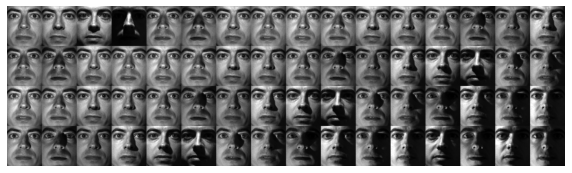

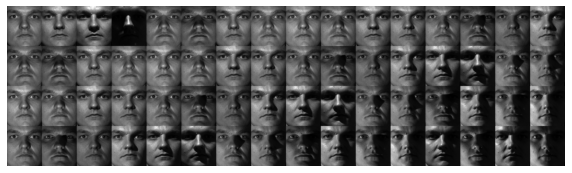

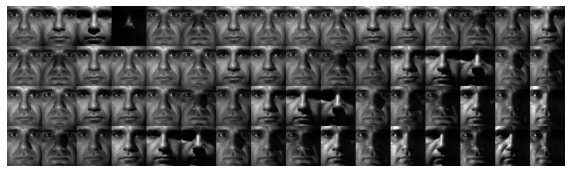

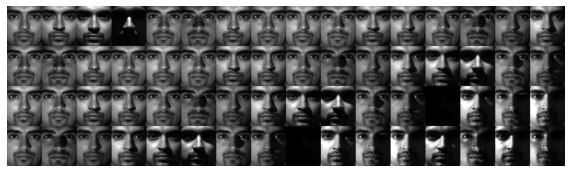

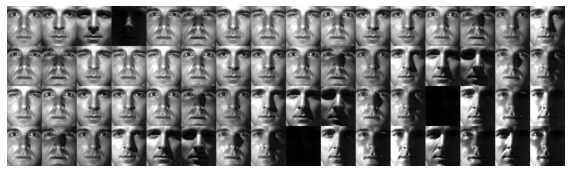

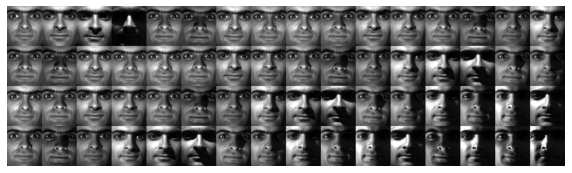

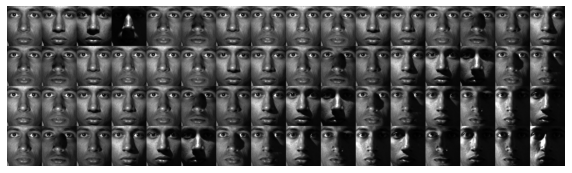

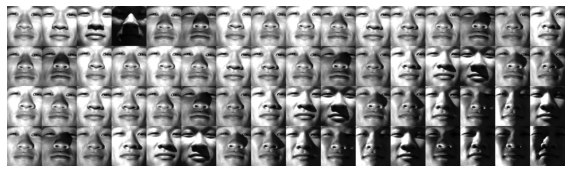

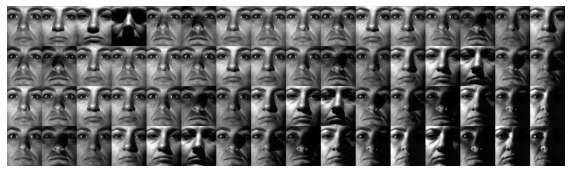

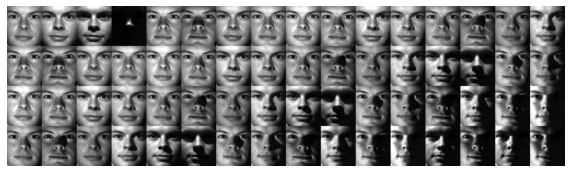

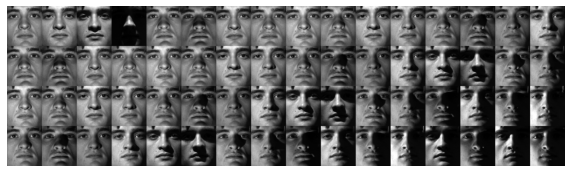

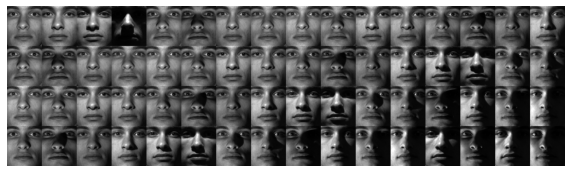

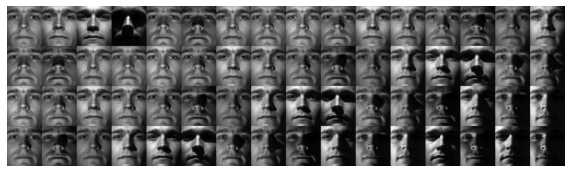

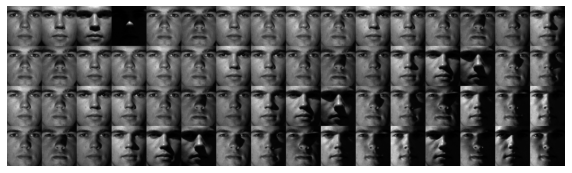

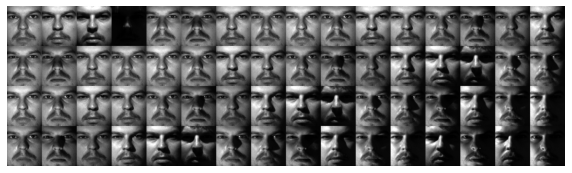

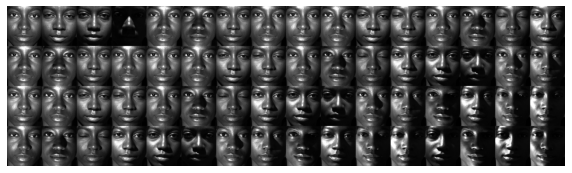

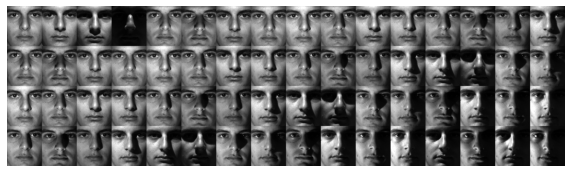

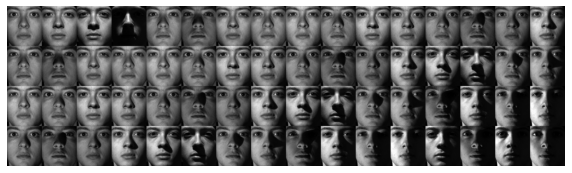

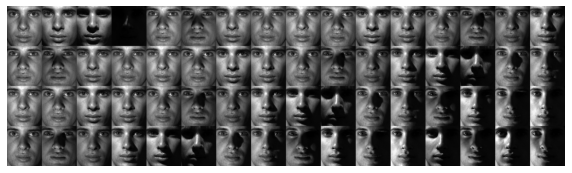

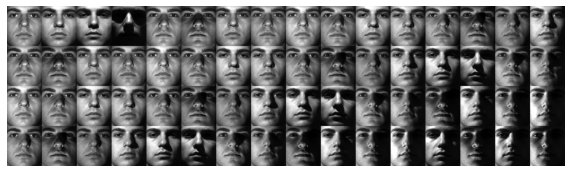

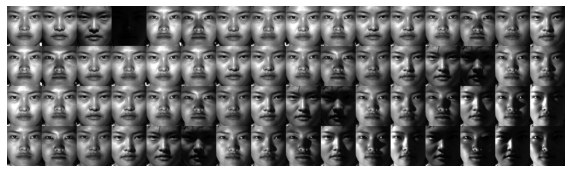

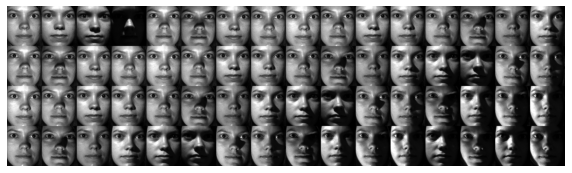

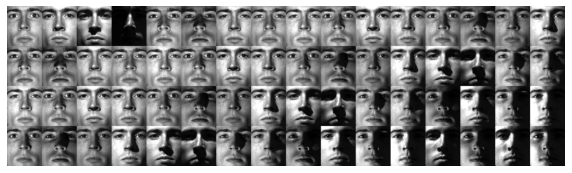

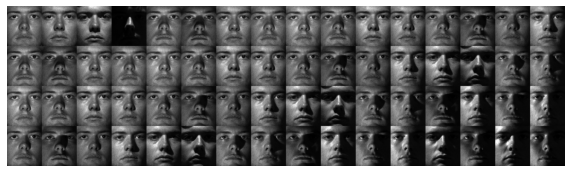

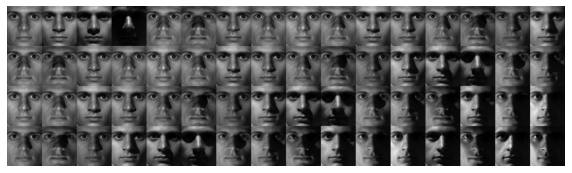

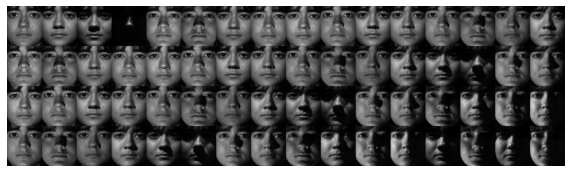

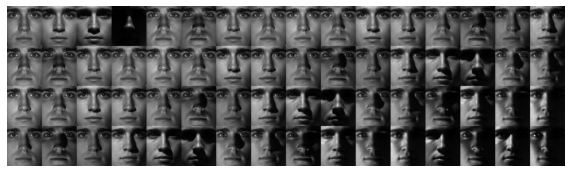

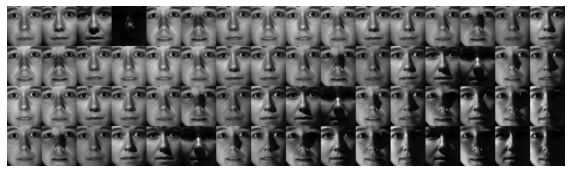

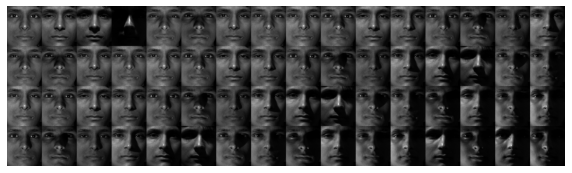

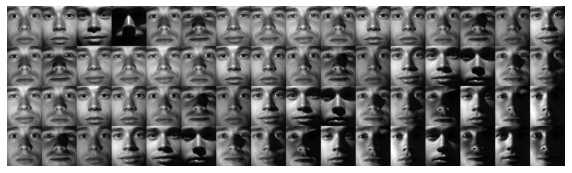

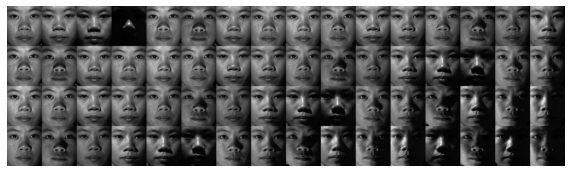

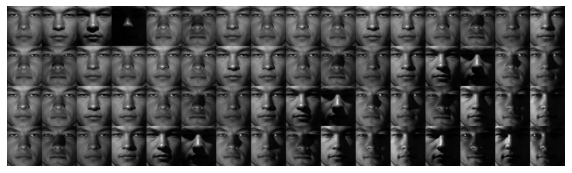

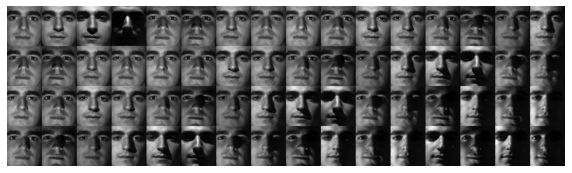

In [7]:
for person in faces.keys():
    photos = np.bmat([[faces[person][j+4*i] for j in range(16)] for i in range(4)])
    img = plt.imshow(photos)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()

We use the first 36 people in the database as our training data for the eigenfaces example, and we hold back two people as a test set. Each image is reshaped into a large column vector, and the average face (the mean of every row) is computed and subtracted from each column vector. The mean-subtracted image vectors are then stacked horizontally as columns in the data matrix. Thus, taking the SVD of the mean-subtracted matrix X results in the PCA.

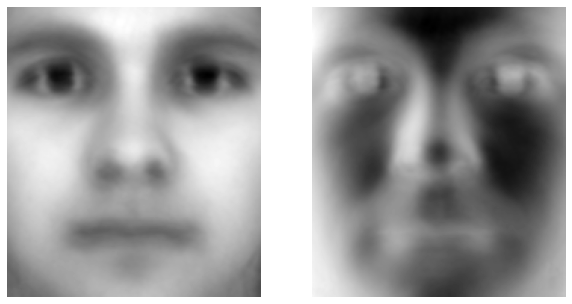

In [8]:
faces = all_faces(matrix=False)
train_matrix = np.column_stack([faces[j][i] for j in range(36) for i in faces[j].keys() ])
avgFace = np.mean(train_matrix,axis=1) # size n*m by 1

# Compute eigenfaces on mean-subtracted training data
X = train_matrix - np.transpose([avgFace] * train_matrix.shape[1])
U, S, VT = np.linalg.svd(X,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

Using the eigenface library, $\mathbf{\tilde{U}}$, obtained by this code, we now attempt to approximately represent the faces that were not in the training data. We will see how well a rank-r SVD basis will approximate this image using the following projection:
\begin{equation*}
    \mathbf{  \tilde{b} =  \tilde{U}\tilde{U}^\dagger b} 
\end{equation*}

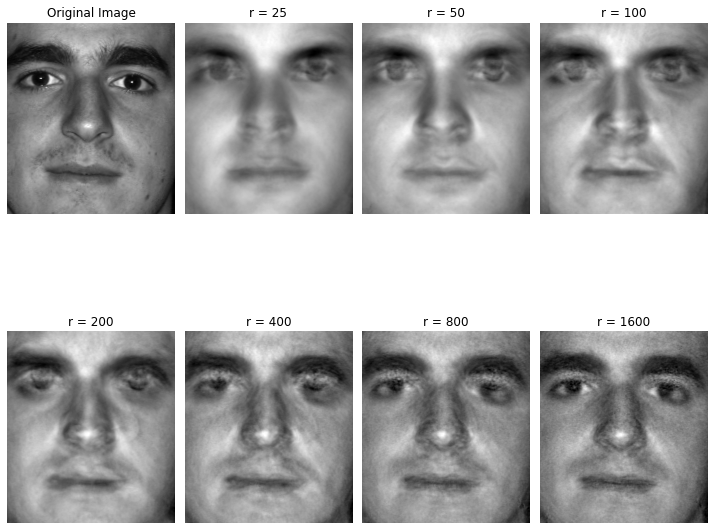

In [9]:
## Now show eigenface reconstruction of image that was omitted from test set
testFace = faces[37][0] # First face of person 37

plt.subplot(2, 4, 1)
img = plt.imshow(np.reshape(testFace,(m,n)).T)
img.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')

testFaceMS = testFace - avgFace
r_list = [25, 50, 100, 200, 400, 800, 1600]

for i,r in enumerate(r_list):
    reconFace = avgFace + U[:,:r]  @ (U[:,:r].T @ testFaceMS)
    plt.subplot(2, 4, i+2)
    img = plt.imshow(np.reshape(reconFace,(m,n)).T)
    plt.title('r = ' + str(r))
    plt.axis('off')
    img.set_cmap('gray')

plt.tight_layout(pad=1.0)
plt.show()

It is an interesting question if the eigenface space is also useful for representing other images like the one of the first example in SVD. Lets see:

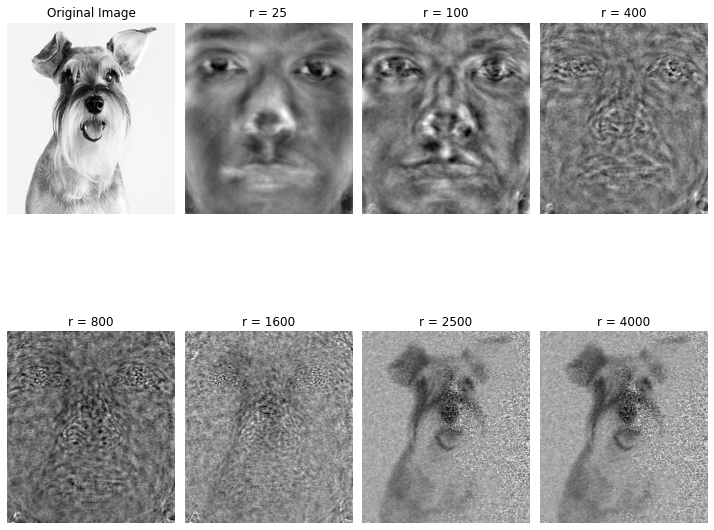

In [28]:
from skimage import io
from matplotlib.image import imread
import os

image = imread(os.path.join('DATA','Funny_resized.png'))
image = np.mean(image,axis=2).T.flatten()

plt.subplot(2, 4, 1)
plt.imshow(np.reshape(image,(m,n)).T)
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')

testFaceMS = image - avgFace
r_list = [25, 100, 400, 800, 1600, 2500, 4000]

for i,r in enumerate(r_list):
    reconFace = avgFace + U[:,:r]  @ (U[:,:r].T @ testFaceMS)
    plt.subplot(2, 4, i+2)
    img = plt.imshow(np.reshape(reconFace,(m,n)).T)
    plt.title('r = ' + str(r))
    plt.axis('off')   
    img.set_cmap('gray')

plt.tight_layout(pad=1.0)
plt.show()

This is possible because the 1600 eigenfaces span a large subspace of the 32256 dimensional image space corresponding to broad, smooth, nonlocalized spatial features, such as cheeks, forehead, mouths, etc.

#### Clasification task with scikit learn PCA

Text(0, 0.5, 'Principal Component 9')

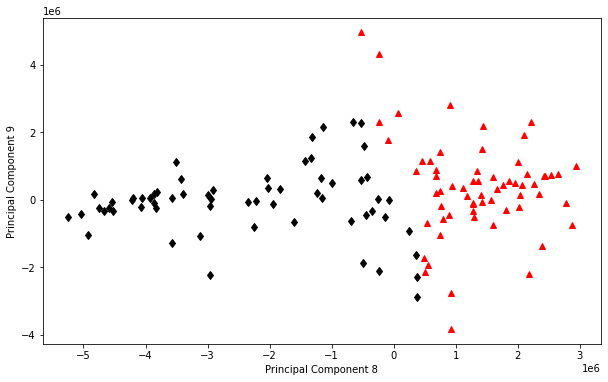

In [248]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams.update({'font.size': 10})

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = StandardScaler().fit_transform(train_matrix)
pca = PCA(n_components=16)
principal_components = pca.fit_transform(x)

P1num = 2 # Person number 2
P2num = 7 # Person number 7

index = lambda i: np.cumsum(mat_contents['nfaces'][0])[i]

p_1 = train_matrix[:,index(P1num-2):index(P1num-1)] 
p_2 = train_matrix[:,index(P2num-2):index(P2num-1)]

PCAmodes = np.array([4, 5]) # Project onto PCA modes 5 and 6
p_1_projection = principal_components[:,PCAmodes].T @ p_1
p_2_projection = principal_components[:,PCAmodes].T @ p_2

plt.plot(p_1_projection[0,:],p_1_projection[1,:], 'd',Color='k',label='Person ' + str(P1num))
plt.plot(p_2_projection[0,:],p_2_projection[1,:], '^',Color='r',label='Person ' + str(P2num))
plt.xlabel('Principal Component ' + str(pca_0))
plt.ylabel('Principal Component ' + str(pca_1))

In [12]:
pca.explained_variance_ratio_

array([0.36728033, 0.17462004, 0.07246236, 0.04608265, 0.02241319,
       0.01929569, 0.01773527, 0.0143939 ])

#### Clasification task with SVD

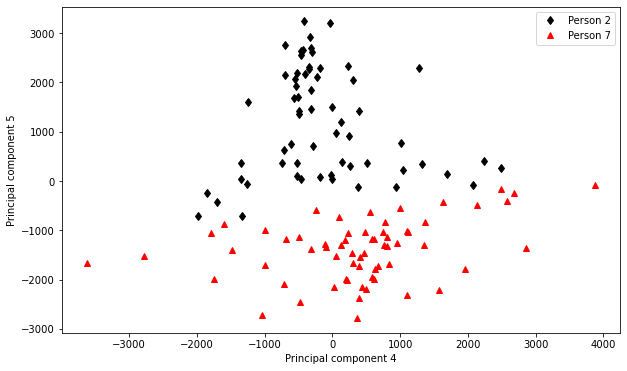

In [239]:
avgFace = np.mean(train_matrix,axis=1) # size n*m by 1

# Compute eigenfaces on mean-subtracted training data
X = train_matrix - np.transpose([avgFace] * train_matrix.shape[1])
U, S, VT = np.linalg.svd(X,full_matrices=0)

P1num = 2 # Person number 2
P2num = 7 # Person number 7

index = lambda i: np.cumsum(mat_contents['nfaces'][0])[i]

p_1 = train_matrix[:,index(P1num-2):index(P1num-1)] 
p_2 = train_matrix[:,index(P2num-2):index(P2num-1)]

PCAmodes = np.array([4, 5]) # Project onto PCA modes 5 and 6
PCACoordsP1 = U[:,PCAmodes].T @ p_1
PCACoordsP2 = U[:,PCAmodes].T @ p_2

plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'d',Color='k',label='Person ' + str(P1num))
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'^',Color='r',label='Person ' + str(P2num))
plt.xlabel('Principal component ' + str(PCAmodes[0])), plt.ylabel('Principal component ' + str(PCAmodes[1]))
plt.legend()
plt.show()

### Optimal Truncation

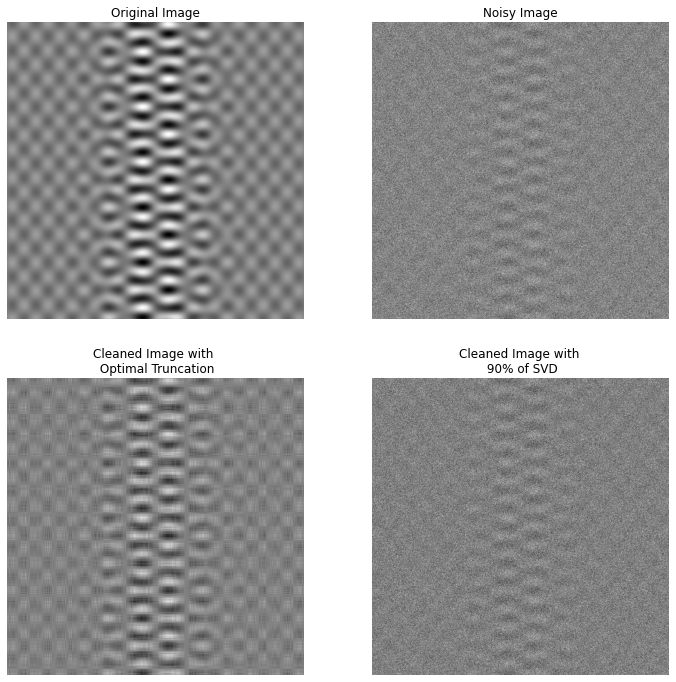

In [105]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 10})

t = np.arange(-3,3,0.01)

Utrue = np.array([np.cos(17*t) , np.sin(11*t)]).T
Strue = np.array([[2, 0],[0, 0.5]])
Vtrue = np.array([np.sin(5*t) * np.exp(-t**2), np.cos(13*t)]).T

X = Utrue @ Strue @ Vtrue.T

sigma = 3
Xnoisy = X + sigma*np.random.randn(*X.shape)

U, S, VT = np.linalg.svd(Xnoisy,full_matrices=0)
cutoff = (4/np.sqrt(3)) * np.sqrt(Xnoisy.shape[0]) * sigma # Hard threshold
r = np.max(np.where(S > cutoff)) # Keep modes w/ sig > cutoff 

Xclean = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:]

cdS = np.cumsum(S) / np.sum(S) # Cumulative energy
r90 = np.min(np.where(cdS > 0.90)) # Find r to capture 90% energy

X90 = U[:,:(r90+1)] @ np.diag(S[:(r90+1)]) @ VT[:(r90+1),:]

plt.subplot(221)
plt.imshow(X), plt.title('Original Image'), plt.axis('off')
plt.subplot(222)
plt.imshow(Xnoisy), plt.title('Noisy Image'), plt.axis('off')
plt.subplot(223)
plt.imshow(Xclean), plt.title('Cleaned Image with \n Optimal Truncation'), plt.axis('off')
plt.subplot(224)
plt.imshow(X90), plt.title('Cleaned Image with \n 90% of SVD'), plt.axis('off')
plt.show()

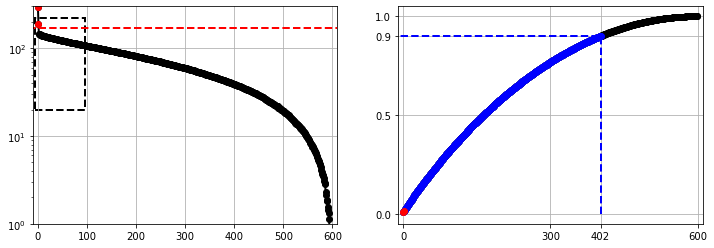

In [102]:
## Plot Singular Values
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 10})

N = Xnoisy.shape[0]

fig1 = plt.figure()

ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o', color='k', LineWidth=2)
ax1.semilogy(np.diag(S[:(r+1)]),'o', color='r', LineWidth=2)
ax1.plot(np.array([-20, N+20]),np.array([cutoff, cutoff]),'--', color='r', LineWidth=2)
rect = patches.Rectangle((-5,20),100,200,LineWidth=2,LineStyle='--',FaceColor='none',EdgeColor='k')
ax1.add_patch(rect)
plt.xlim((-10,610)), plt.ylim((1,300))
ax1.grid()


ax3 = fig1.add_subplot(122)

ax3.plot(cdS,'-o',color='k',LineWidth=2)
ax3.plot(cdS[:(r90+1)],'o',color='b',LineWidth=2)
ax3.plot(cdS[:(r+1)],'o',color='r',LineWidth=2)
plt.xticks(np.array([0, 300, r90, 600]))
plt.yticks(np.array([0, 0.5, 0.9, 1]))
plt.xlim((-10,610))
ax3.plot(np.array([r90, r90, -10]),np.array([0, 0.9, 0.9]),'--',color='b',LineWidth=2)
ax3.grid()

plt.show()



In the last image you can see what happens if you pick all modes up to the 90% of svd eigenvalues vs if you use the optimal trncation. In the first case you would select 402 modes, even when almost all of them are contrinuting to add noise to the image. In the Optimal truncation case you would keep just 2 nodes. 

### Importance of Alignment

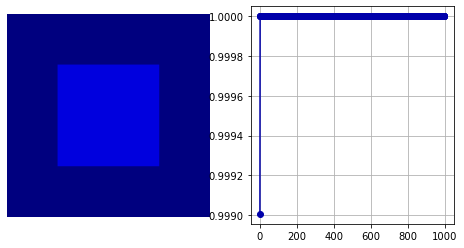

In [21]:
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np
import skimage.transform

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams.update({'font.size': 10})

n = 1000
q = int(n/4)
X = np.ones((n,n))/n
X[(q-1):(3*q),(q-1):(3*q)] = 1

nAngles = 12 # Sweep through 12 different angles, from 0:4:44 degrees
cm_np = np.array([[0,0,2/3],[0,0,1],[0,1/3,1],[0,2/3,1],[0,1,1],[1/3,1,2/3],[2/3,1,1/3],
                  [1,1,0],[1,2/3,0],[1,1/3,0],[1,0,0],[2/3,0,0]])


cmap = plt.cm.jet
cmap.set_bad(alpha = 0.0)

U, S, VT = np.linalg.svd(X,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
plt.imshow(np.ma.masked_where(X == 0, X),vmin=0,vmax=12)
plt.set_cmap(cmap)
plt.axis('off')


ax2 = fig1.add_subplot(122)
plt.plot(np.cumsum(S)/np.sum(S),'-o',color=tuple(cm_np[0]))
plt.grid()

plt.show()

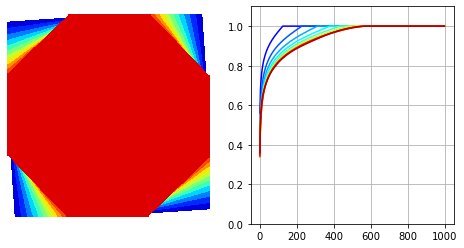

In [20]:
Xrot = X

fig, axs = plt.subplots(1,2)

for j in range(1,nAngles):
    Xrot = skimage.transform.rotate(X,j*4) #rotate by theta = j*4 degrees
    Xrot[np.nonzero(Xrot)] = j
    
    U, S, VT = np.linalg.svd(Xrot)

    axs[0].imshow(np.ma.masked_where(Xrot == 0, Xrot),vmin=0,vmax=nAngles)
    plt.set_cmap(cmap)
    axs[0].axis('off')
    axs[1].plot(np.cumsum(S)/np.sum(S),'-',color=tuple(cm_np[j]))
    axs[1].axis('on'), axs[1].grid(1)
    plt.ylim(0,1.1)

plt.show()

In resume, the last plot shows the numbers of modes needed to achieve a 90% of the svd eigenvalues cumulative sum, for rotated squares.

### Random SVD

In [6]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
from skimage import io

plt.rcParams['figure.figsize'] = [16,6]
plt.rcParams.update({'font.size': 18})

# Define randomized SVD function
def rSVD(X,r,q,p):
    # Step 1: Sample column space of X with P matrix
    ny = X.shape[1]
    P = np.random.randn(ny,r+p)
    Z = X @ P
    for k in range(q):
        Z = X @ (X.T @ Z)

    Q, R = np.linalg.qr(Z,mode='reduced')

    
    # Step 2: Compute SVD on projected Y = Q.T @ X
    Y = Q.T @ X
    UY, S, VT = np.linalg.svd(Y,full_matrices=0)
    U = Q @ UY

    return U, S, VT

Time to compute deterministic SVD: 3.5103843212 seconds.
Time to compute random SVD: 0.2753012180 seconds.
Time to reconstruct Image from deterministic SVD: 5.3650519848 seconds.
Time to reconstruct Image from random SVD: 5.2858319283 seconds.


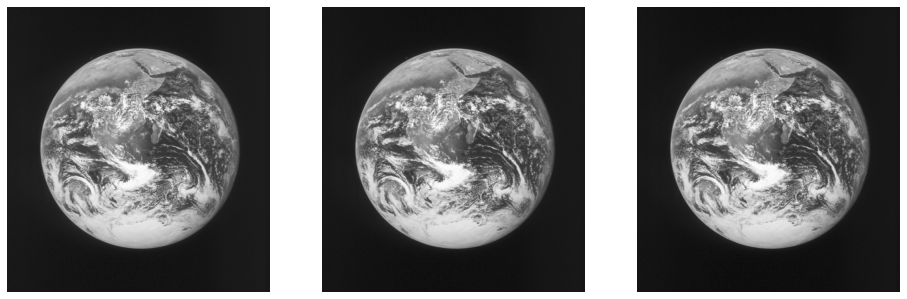

In [17]:
from time import time

url = 'https://eol.jsc.nasa.gov/DatabaseImages/scanned/highres/AS17/AS17-148-22727_2.JPG'
A = io.imread(url)
X = np.mean(A,axis=2) # Convert RGB -> grayscale

start_time = time()
U, S, VT = np.linalg.svd(X,full_matrices=0) # Deterministic SVD
elapsed_time = time() - start_time
print("Time to compute deterministic SVD: %.10f seconds." % elapsed_time)


r = 400 # Target rank
q = 1   # Power iterations
p = 5   # Oversampling parameter

start_time = time()
rU, rS, rVT = rSVD(X,r,q,p)
elapsed_time = time() - start_time
print("Time to compute random SVD: %.10f seconds." % elapsed_time)

## Reconstruction
start_time = time()
XSVD = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:] # SVD approximation
errSVD = np.linalg.norm(X-XSVD,ord=2) / np.linalg.norm(X,ord=2)
elapsed_time = time() - start_time
print("Time to reconstruct Image from deterministic SVD: %.10f seconds." % elapsed_time)

start_time = time()
XrSVD = rU[:,:(r+1)] @ np.diag(rS[:(r+1)]) @ rVT[:(r+1),:] # SVD approximation
errSVD = np.linalg.norm(X-XrSVD,ord=2) / np.linalg.norm(X,ord=2)
elapsed_time = time() - start_time
print("Time to reconstruct Image from random SVD: %.10f seconds." % elapsed_time)

## Plot
fig, axs = plt.subplots(1,3)

plt.set_cmap('gray')
axs[0].imshow(X)
axs[0].axis('off')
axs[1].imshow(XSVD)
axs[1].axis('off')
axs[2].imshow(XrSVD)
axs[2].axis('off')

plt.show()

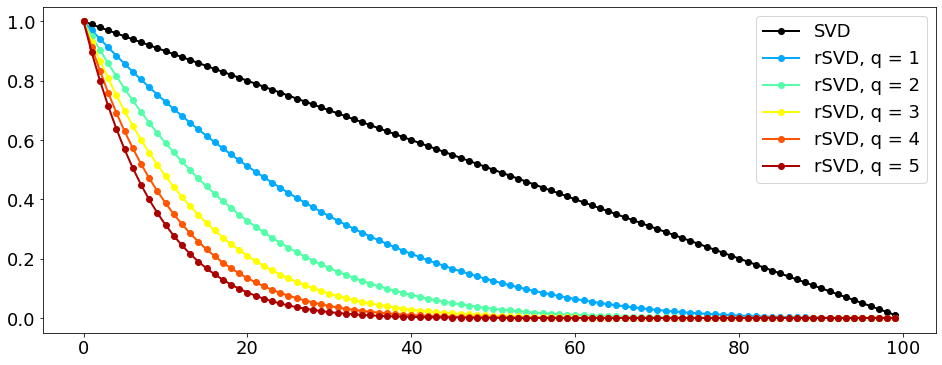

In [18]:
## Illustrate power iterations
X = np.random.randn(1000,100)
U, S, VT = np.linalg.svd(X,full_matrices=0)
S = np.arange(1,0,-0.01)
X = U @ np.diag(S) @ VT

color_list = np.array([[0,0,2/3],  # Define color map
                 [0,0,1],
                 [0,1/3,1],
                 [0,2/3,1],
                 [0,1,1],
                 [1/3,1,2/3],
                 [2/3,1,1/3],
                 [1,1,0],
                 [1,2/3,0],
                 [1,1/3,0],
                 [1,0,0],
                 [2/3,0,0]])

plt.plot(S,'o-',color='k',LineWidth=2,label='SVD')

Y = X
for q in range(1,6):
    Y = X.T @ Y
    Y = X @ Y
    Uq, Sq, VTq = np.linalg.svd(Y,full_matrices=0)
    plt.plot(Sq,'-o',color=tuple(color_list[2*q+1]),LineWidth=2,label='rSVD, q = '+str(q))

plt.legend()
plt.show()